In [1]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
amzn = quandl.get("WIKI/AMZN", start_date="2017-01-01", end_date="2018-01-01")

In [3]:
amzn.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066.0,0.0,1.0,757.92,758.7595,747.7000,753.67,3521066.0
2017-01-04,758.39,759.6800,754.2000,757.18,2510526.0,0.0,1.0,758.39,759.6800,754.2000,757.18,2510526.0
2017-01-05,761.55,782.3999,760.2557,780.45,5830068.0,0.0,1.0,761.55,782.3999,760.2557,780.45,5830068.0
2017-01-06,782.36,799.4400,778.4800,795.99,5986234.0,0.0,1.0,782.36,799.4400,778.4800,795.99,5986234.0
2017-01-09,798.00,801.7742,791.7700,796.92,3446109.0,0.0,1.0,798.00,801.7742,791.7700,796.92,3446109.0


In [4]:
short_window = 30
long_window = 90
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 
signals['positions'] = signals['signal'].diff()

In [5]:
signals

,signal,short_mavg,long_mavg,positions
Date,,,,
2017-01-03,0.0,753.670000,753.670000,NaN
2017-01-04,0.0,755.425000,755.425000,0.0
2017-01-05,0.0,763.766667,763.766667,0.0
2017-01-06,0.0,771.822500,771.822500,0.0
2017-01-09,0.0,776.842000,776.842000,0.0
2017-01-10,0.0,780.018333,780.018333,0.0
2017-01-11,0.0,782.732857,782.732857,0.0
2017-01-12,0.0,786.596250,786.596250,0.0
2017-01-13,0.0,789.990000,789.990000,0.0


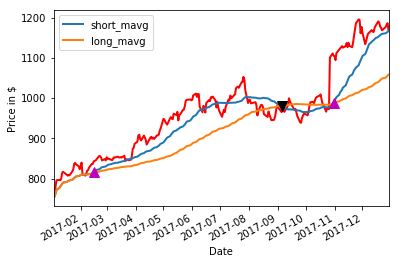

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
amzn['Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()